## Bussiness Understanding
Data set ini berfungsi untuk meprediksi pasien apakah rentan terkena penyakit jantung atau tidak, sehingga dapat mempermudah pekerjaan tenaga medis dalam mendiagnosa penyakit pasien dan mempermudah dalam pemberian penanganan baik berupa tindakan ataupun pemberian obat

In [1]:
import pandas as pd
import numpy as np

## Data Understanding
- age = umur 
- sex = gender 
1 = laki-laki
2 = perempuan
- cp = jenis nyeri dada
1 = angina tipikal
2 = angina atipikal
3 = non angina
4 = tanpa gejala
- trtbps = tekanan darah dalam istirahat (di mm Hg)
- chol = tinggi koresterol (mg/dl)
- fbs = gula darah puasa lebih besar dari 120 mg/dl
1 = benar
0 = salah
- restecg = hasil elektrokardiografi istirahat
0 = normal
1 = ada kelainan gelombang ST-T
2 = kemungkinan/pasti hypertropyh
- thalachh = detak jantung maksimum yang dicapai
- exng = angina akibat olahraga
1 = ya
0 = tidak
- oldpeak = depresi ST yang diakibatkan oleh latihan relative terhadap saat istirahat. (0-2)
- slp = slope (0-3)
- caa = pembuluh utama jantung (0-3)
- thall = thall rate (0-3)

## Data Preparation

## load dataset

In [22]:
df = pd.read_csv('Tabs/heart.csv')
df.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
210,23,1,2,20,60,0,0,49,0,0.4,1,1,3,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [25]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [26]:
numerical

['oldpeak']

In [27]:
catgcols

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'slp',
 'caa',
 'thall',
 'output']

In [28]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [29]:
ind_col = [col for col in df.columns if col != 'output']
dep_col = 'output'

In [30]:
df[dep_col].value_counts()

1    165
0    138
Name: output, dtype: int64

## tranformasi dataset

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [33]:
df['output'] = le.fit_transform(df['output'])

In [34]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [35]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,3,31,64,1,0,49,0,2.3,0,0,1,1
1,3,1,2,22,80,0,1,84,0,3.5,0,0,2,1
2,7,0,1,22,35,0,0,71,0,1.4,2,0,2,1
3,22,1,1,14,67,0,1,76,0,0.8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,0.6,2,0,2,1


In [36]:
df.to_csv('heart.csv',index=False)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Modelling

## membuat model decision tree

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"output report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.871900826446281
akurasi data testing = 0.7540983606557377 

confusion matrix : 
[[22  5]
 [10 24]]

output report : 
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.83      0.71      0.76        34

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



## Evaluasi Model


## simulasi model

In [40]:
input_data=(3,1,2,22,80,0,1,84,0,3.5,0,0,2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('Pasien tidak terkena penyakit jantung')
else:
    print('Pasien terkena penyakit jantung')  

[1]
Pasien terkena penyakit jantung


c:\Users\fadya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## visualisasi pohon keputusan

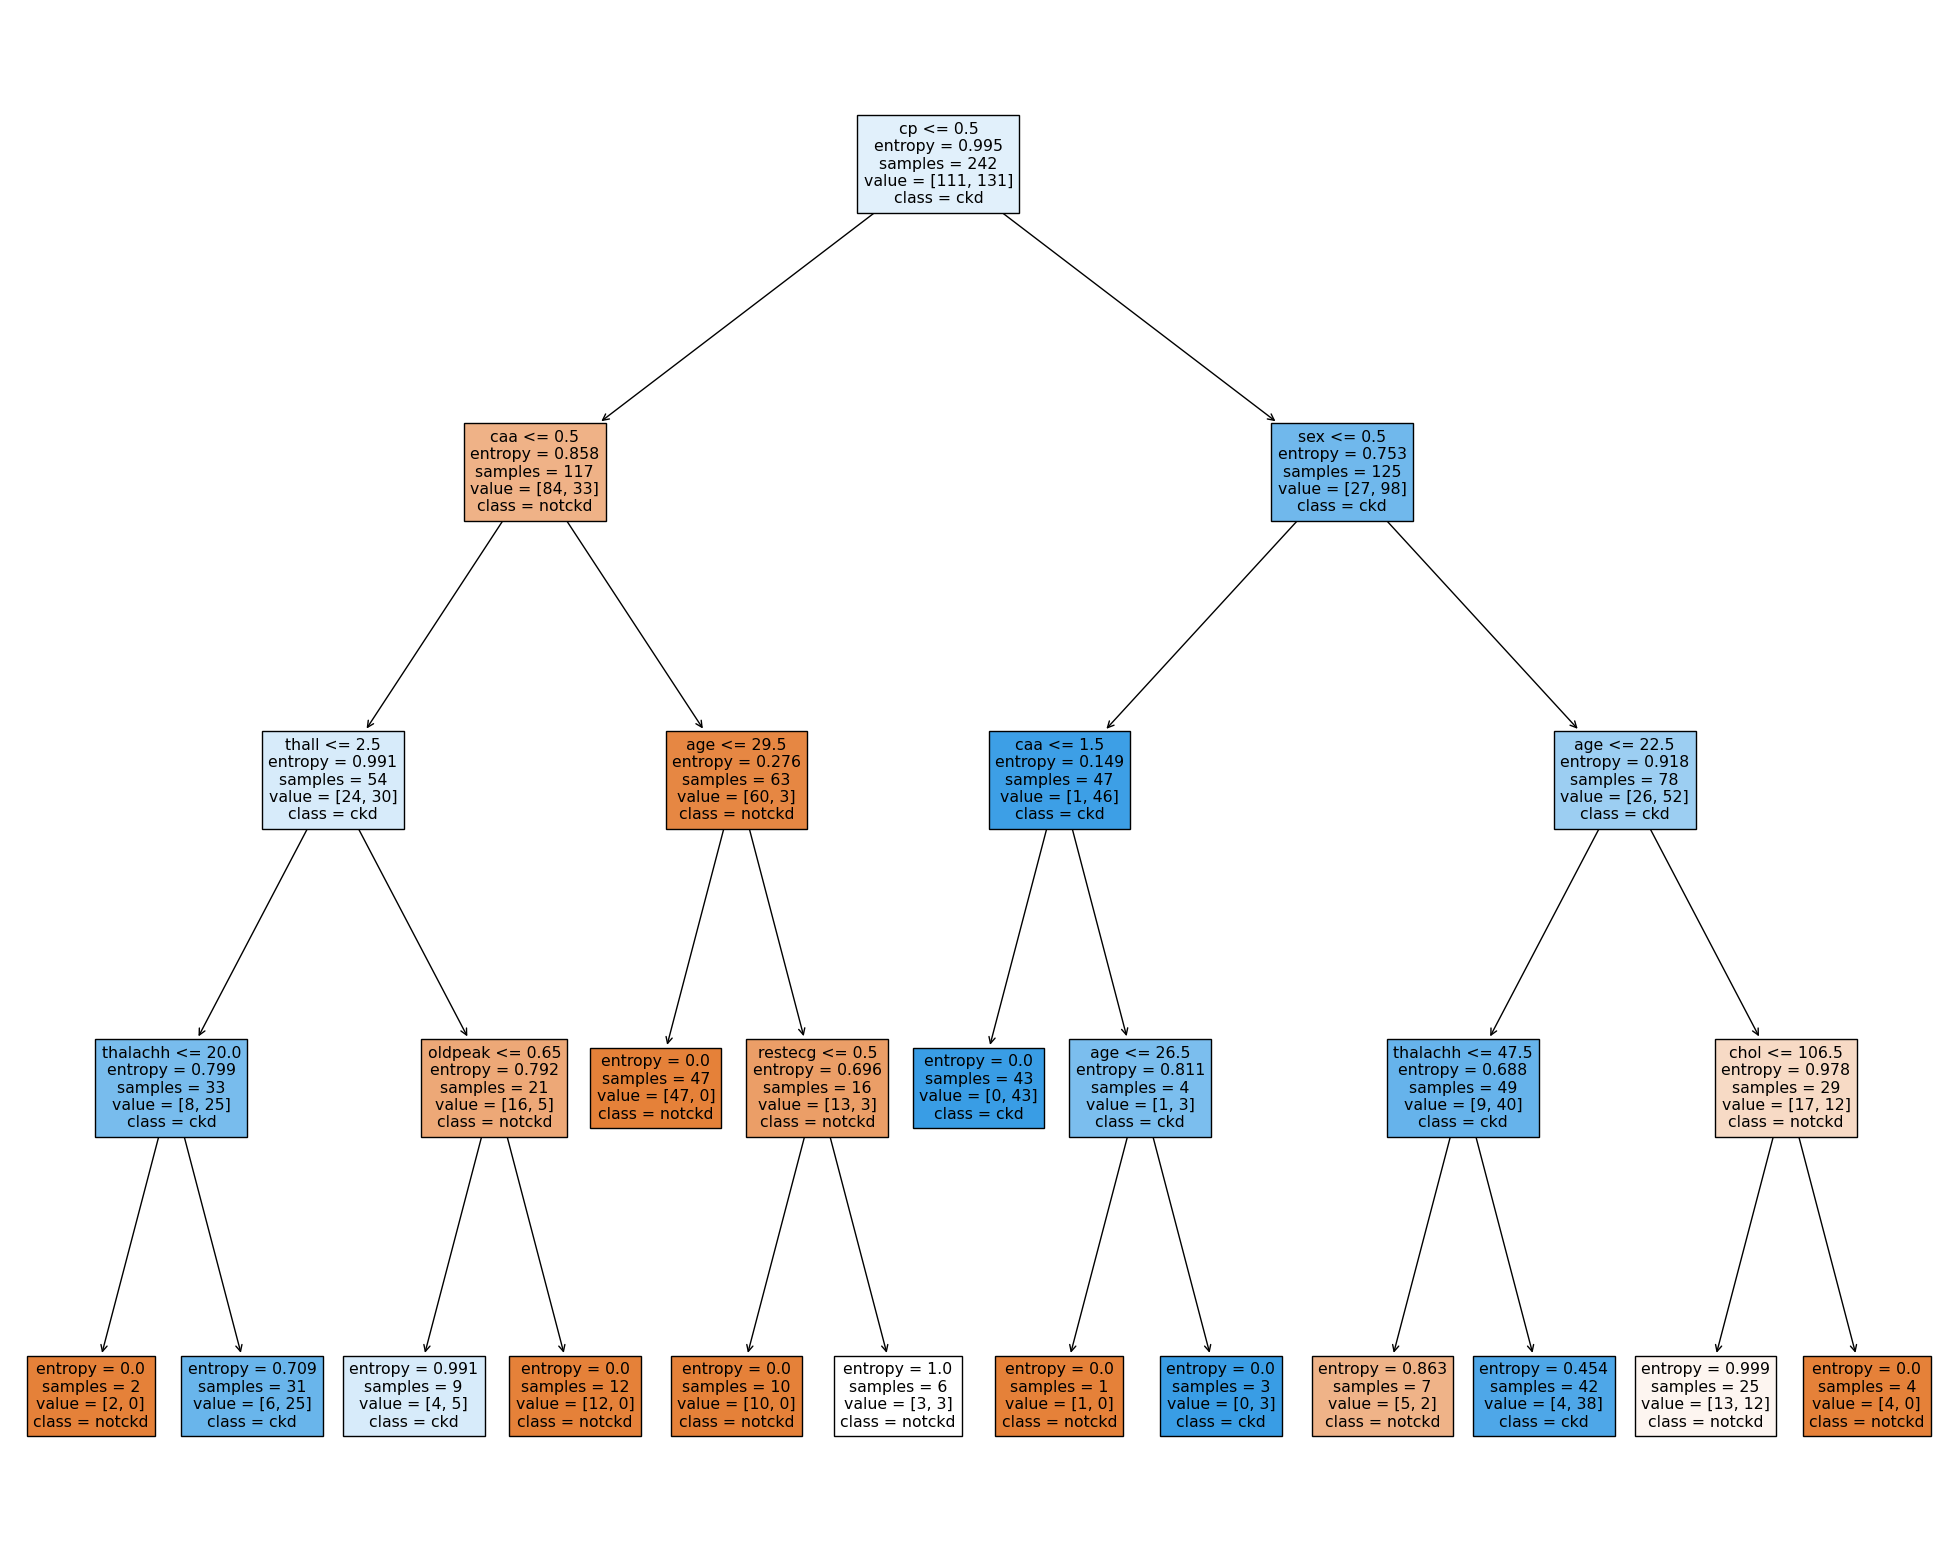

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(model,
            feature_names = ind_col,
            class_names=['notckd','ckd'],
            filled=True)

## Deployment

In [42]:
import pickle

In [43]:
filename = 'heart.sav'
pickle.dump(model, open(filename, 'wb'))

Streamlit